In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

[*********************100%%**********************]  1 of 1 completed


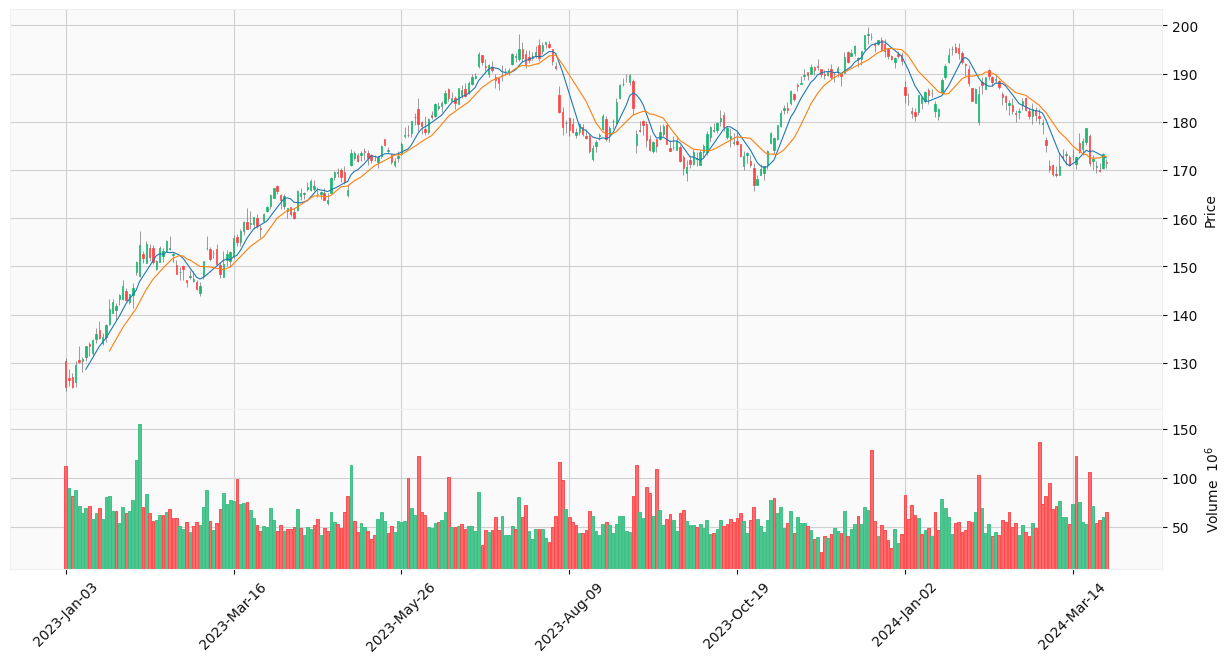

In [5]:
# Plotar gráficos Apple
dados = yf.download('AAPL', start='2023-01-01', end='2024-03-29')
mpf.plot(dados, type='candle', figsize=(16,8), volume=True, mav=(7,14), style='yahoo')

In [9]:
def verdadeira_api_magica(ticker, inicio, fim):
    dados = yf.download(ticker, start=inicio, end=fim)

    dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fecha_Ajuste', 'Volume']

    df = dados.copy()

    df['Data'] = df.index

    df['Data'] = df['Data'].apply(mdates.date2num)

    df['MA7'] = df['Fechamento'].rolling(window=7).mean()
    df['MA14'] = df['Fechamento'].rolling(window=14).mean()

    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        vertical_spacing=0.1,
                        subplot_titles=('Candlesticks', 'Volume Transacionado'),
                        row_width=[0.2, 0.7])

    '''
    "No gráfico de candlestick, cada candle representa um dia de negociação,
    mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
    '''
    # Adicionando o gráfico de candlestick
    fig.add_trace(go.Candlestick(x=df.index,
                                open=df['Abertura'],
                                high=df['Maximo'],
                                low=df['Minimo'],
                                close=df['Fechamento'],
                                name='Candlestick'),
                                row=1, col=1)

    # Adicionando as médias móveis
    # Adicionamos também médias móveis ao mesmo subplot para análise de tendências
    fig.add_trace(go.Scatter(x=df.index,
                            y=df['MA7'],
                            mode='lines',
                            name='MA7 - Média Móvel 7 Dias'),
                            row=1, col=1)

    fig.add_trace(go.Scatter(x=df.index,
                            y=df['MA14'],
                            mode='lines',
                            name='MA14 - Média Móvel 14 Dias'),
                            row=1, col=1)

    # Adicionando o gráfico de barras para o volume
    # Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
    fig.add_trace(go.Bar(x=df.index,
                        y=df['Volume'],
                        name='Volume'),
                        row=2, col=1)

    # Atualizando layout
    #Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
    fig.update_layout(yaxis_title='Preço',
                    xaxis_rangeslider_visible=False,  # Desativa o range slider
                    width=1100, height=600)

    # Mostrando o gráfico
    fig.show()

In [10]:
verdadeira_api_magica('AAPL', '2023-03-01', '2024-03-29')

[*********************100%%**********************]  1 of 1 completed